In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vasil123","key":"25908067c50b1265f84e7eb9333733b9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c facebook-recruiting-iii-keyword-extraction

 99% 718M/725M [00:04<00:00, 169MB/s]
100% 725M/725M [00:04<00:00, 155MB/s]
100% 4.81M/4.81M [00:00<00:00, 44.2MB/s]

100% 2.18G/2.19G [00:38<00:00, 26.8MB/s]
100% 2.19G/2.19G [00:38<00:00, 61.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('Train.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
# importing csv module
import csv
  
# csv file name
filename = "drive/MyDrive/Dataset.csv"
  
# initializing the titles and rows list
fields = []
rows = []
  
# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
      
    # extracting field names through first row
    fields = next(csvreader)
  
    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)
  
    # get total number of rows
    print("Total no. of rows: %d"%(csvreader.line_num))
  
# printing the field names
print('Field names are:' + ', '.join(field for field in fields))
  
#  printing first 5 rows
print('\nFirst 5 rows are:\n')
for row in rows[:5]:
    # parsing each column of a row
    for col in row:
        print("%10s"%col),
    print('\n')

Total no. of rows: 1263274
Field names are:, Title, Tag

First 5 rows are:

         0
Has anyone got experience creating **SQL-based ASP.NET** site-map providers?I've got the default XML file `web.sitemap` working properly with my Menu and**SiteMapPath** controls, but I'll need a way for the users of my site tocreate and modify pages dynamically.I need to tie page viewing permissions into the standard `ASP.NET` membershipsystem as well.
['sql', 'asp.net']


         1
I have a little game written in C#. It uses a database as back-end. It's atrading card game, and I wanted to implement the function of the cards as ascript.What I mean is that I essentially have an interface, `ICard`, which a cardclass implements (`public class Card056 : ICard`) and which contains functionthat are called by the game.Now, to make the thing maintainable/moddable, I would like to have the classfor each card as source code in the database and essentially compile it onfirst use. So when I have to add/change a

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.multiclass import OneVsRestClassifier

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/stackoverflow.csv',index_col=0)

In [ ]:
df=pd.read_csv('/content/files/Train.csv',encoding = "ISO-8859-1",index_col=0,nrows=100000)

In [ ]:
df.head()

,Title,Body,Tags
Id,,,
1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [ ]:
df.shape

(100000, 3)

In [ ]:
import ast
df['Tags'].iloc[0].split(' ')

['php', 'image-processing', 'file-upload', 'upload', 'mime-types']

In [ ]:
df['Title'].iloc[0]

'How to check if an uploaded file is an image without mime type?'

In [ ]:
df['Tags']=df['Tags'].apply(lambda x:x.split(' '))

In [ ]:
df.dropna(inplace=True)

In [ ]:
type(df['Tags'].iloc[0][0])

str

In [ ]:
y=df['Tags']

In [ ]:
multilabel=MultiLabelBinarizer()
y=multilabel.fit_transform(df['Tags'])

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
multilabel.classes_

array(['.class-file', '.each', '.emf', ..., 'zurb-foundation', 'zwoptex',
       'zxing'], dtype=object)

In [ ]:
df_label=pd.DataFrame(y,columns=multilabel.classes_)

In [ ]:
tfidf = TfidfVectorizer(analyzer='word', max_features=10000, stop_words='english')
X = tfidf.fit_transform(df['Title'])

In [ ]:
len(tfidf.get_feature_names())

10000

In [ ]:
len(tfidf.vocabulary_)

10000

In [ ]:
X.shape[1],y.shape[1]

(10000, 12547)

In [ ]:
x=X.toarray()

In [ ]:
X

<457562x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 18305449 stored elements in Compressed Sparse Row format>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
sgd = SGDClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()

In [ ]:
def j_score(y_true, y_pred):
  jaccard = np.minimum(y_true, y_pred).sum(axis = 1)/np.maximum(y_true, y_pred).sum(axis = 1)
  return jaccard.mean()*100


def print_score(y_pred, clf):
  print("Clf: ", clf.__class__.__name__)
  print('Jacard score: {}'.format(j_score(y_test, y_pred)))
  print('----')

In [ ]:
for classifier in [LinearSVC(C=1.5, penalty = 'l1', dual=False)]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X, y)
  # y_pred = clf.predict(X_test)
  # print_score(y_pred, classifier)
  example=['how to use printf in c++ and c ? ']
  test_X=tfidf.transform(example)
  print(multilabel.inverse_transform(clf.predict(test_X)))

NameError: ignored

In [ ]:
for classifier in [sgd, lr, svc]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X, y)
  # y_pred = clf.predict(X_test)
  # print_score(y_pred, classifier)
  print(multilabel.inverse_transform(clf.predict(test_X)))

[()]
[()]


KeyboardInterrupt: ignored

In [ ]:
example=['how to use printf in c++ and c ? ']
test_X=tfidf.transform(example)

In [ ]:
test_X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
multilabel.inverse_transform(clf.predict(test_X))

[('c', 'printf')]

In [ ]:
X_test.shape

(9796, 10000)

In [ ]:
from keras.models import Sequential
from keras import layers
input_dim = X_train.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                100010    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 100,021
Trainable params: 100,021
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import scipy
scipy.sort(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.sort is deprecated and will be removed in SciPy 2.0.0, use numpy.sort instead
  


AxisError: ignored

In [ ]:
X_train[2]

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [ ]:
history = model.fit(X_train, y_train,
                     epochs=100,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=64)

InvalidArgumentError: ignored

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu",input_dim=X_train.shape[1])


model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))


model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))


model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

#Do not use softmax for multilabel classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins. 

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#like multi label, in this example.
#But, also good for binary mutually exclusive (cat or not cat). 

model.summary()

#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label. 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


SyntaxError: ignored

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

In [ ]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
# Create the model
model = Sequential()
model.add(Dense(16,activation='relu', input_dim=X.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='sigmoid'))

# Compile the model
model.compile(loss=binary_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
history=model.fit(x, y,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_split=0.2)

Epoch 1/10
500/500 [==============================] - 23s 44ms/step - loss: 0.0505 - accuracy: 0.0261 - val_loss: 0.0017 - val_accuracy: 0.0464
Epoch 2/10
500/500 [==============================] - 21s 42ms/step - loss: 0.0017 - accuracy: 0.0302 - val_loss: 0.0017 - val_accuracy: 0.0180
Epoch 3/10
500/500 [==============================] - 21s 42ms/step - loss: 0.0017 - accuracy: 0.0302 - val_loss: 0.0017 - val_accuracy: 0.0235
Epoch 4/10
500/500 [==============================] - 21s 43ms/step - loss: 0.0017 - accuracy: 0.0311 - val_loss: 0.0017 - val_accuracy: 0.0464
Epoch 5/10
500/500 [==============================] - 21s 42ms/step - loss: 0.0017 - accuracy: 0.0314 - val_loss: 0.0017 - val_accuracy: 0.0233
Epoch 6/10
500/500 [==============================] - 21s 42ms/step - loss: 0.0017 - accuracy: 0.0318 - val_loss: 0.0017 - val_accuracy: 0.0105
Epoch 7/10
500/500 [==============================] - 21s 42ms/step - loss: 0.0017 - accuracy: 0.0300 - val_loss: 0.0017 - val_accuracy:

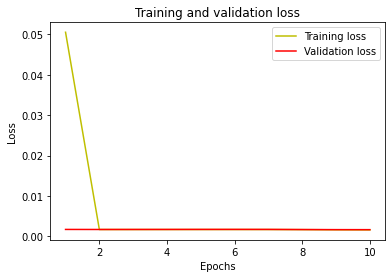

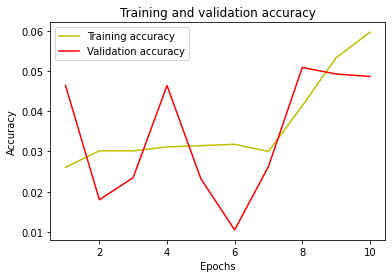

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
def j_score(y_true,y_pred):
  jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)
  return jaccard.mean()*100

def print_score(y_pred,clf):
  print('Clf : ',clf.__class__.__name__)
  print('Jaccard score : {}'.format(j_score(y,y_pred)))
  print('------')

In [ ]:
# Imports
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

# Configuration options



# Create the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=1000))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(y.shape[1], activation='sigmoid'))

# Compile the model
model.compile(loss=binary_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
model.fit(X, y,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_split=0.3)

Epoch 1/10
5005/5005 [==============================] - 14s 3ms/step - loss: 0.1677 - accuracy: 0.4017 - val_loss: 0.1219 - val_accuracy: 0.5533
Epoch 2/10
5005/5005 [==============================] - 13s 3ms/step - loss: 0.1173 - accuracy: 0.5605 - val_loss: 0.1097 - val_accuracy: 0.5889
Epoch 3/10
5005/5005 [==============================] - 12s 2ms/step - loss: 0.1114 - accuracy: 0.5795 - val_loss: 0.1063 - val_accuracy: 0.6043
Epoch 4/10
5005/5005 [==============================] - 13s 3ms/step - loss: 0.1083 - accuracy: 0.5882 - val_loss: 0.1042 - val_accuracy: 0.6107
Epoch 5/10
5005/5005 [==============================] - 13s 3ms/step - loss: 0.1062 - accuracy: 0.5937 - val_loss: 0.1021 - val_accuracy: 0.6224
Epoch 6/10
5005/5005 [==============================] - 12s 2ms/step - loss: 0.1045 - accuracy: 0.5982 - val_loss: 0.1011 - val_accuracy: 0.6191
Epoch 7/10
5005/5005 [==============================] - 12s 2ms/step - loss: 0.1033 - accuracy: 0.6011 - val_loss: 0.1009 - val_ac

In [ ]:
p=model.predict(test_X.toarray())

In [ ]:
test_x=[]
for i in p[0]:
  if i>0.5:
    test_x.append(1)
  else:
    test_x.append(0)

In [ ]:
tt=[]
tt.append(test_x)

In [ ]:
multilabel.inverse_transform(np.array(tt))

[('c',)]

In [ ]:
i=0
max_val=0
max_index=-1
for val in predict[0]:
  if max_val<val:
    max_val=val
    max_index=i
  print(val)
  i+=1

In [ ]:
y_pred=model.predict(x)

In [ ]:
p

array([[6.77322023e-05, 4.96804714e-04, 7.47334570e-06, 8.62337232e-01,
        1.44597888e-03, 1.55277610e-01, 1.08014254e-04, 4.94691730e-03,
        2.11656094e-04, 2.83688307e-04, 4.26322222e-03, 1.98990107e-04,
        2.43008781e-05, 8.75188343e-05, 1.10921264e-03, 3.48432362e-02,
        3.19984555e-03, 4.93612885e-03, 1.09468470e-04, 7.58091301e-06]],
      dtype=float32)

In [ ]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model_1.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp_k7n7g30/assets


In [ ]:
ddf=pd.DataFrame(tfidf.get_feature_names())

In [ ]:
df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

In [ ]:
ddf.iloc[100]

0    0ff
Name: 100, dtype: object

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from datetime import datetime

In [ ]:
#This method seems more appropriate to work with this much data.
#creating the connection with database file.
if os.path.isfile('train_no_dup.db'):
    start = datetime.now()
    con = sqlite3.connect('train_no_dup.db')
    tag_data = pd.read_sql_query("""SELECT Tags FROM no_dup_train""", con)
    #Always remember to close the database
    con.close()

    # Let's now drop unwanted column.
    tag_data.drop(tag_data.index[0], inplace=True)
    #Printing first 5 columns from our data frame
    tag_data.head()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cells to genarate train.db file")

Please download the train.db file from drive or run the above cells to genarate train.db file
